In [3]:
import os
import zipfile
import requests

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set()
sns.set_style("whitegrid")

In [4]:
descr_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.names'
r = requests.get(descr_url)
print(r.text)

1. Title: Mushroom Database

2. Sources: 
    (a) Mushroom records drawn from The Audubon Society Field Guide to North
        American Mushrooms (1981). G. H. Lincoff (Pres.), New York: Alfred
        A. Knopf
    (b) Donor: Jeff Schlimmer (Jeffrey.Schlimmer@a.gp.cs.cmu.edu)
    (c) Date: 27 April 1987

3. Past Usage:
    1. Schlimmer,J.S. (1987). Concept Acquisition Through Representational
       Adjustment (Technical Report 87-19).  Doctoral disseration, Department
       of Information and Computer Science, University of California, Irvine.
       --- STAGGER: asymptoted to 95% classification accuracy after reviewing
           1000 instances.
    2. Iba,W., Wogulis,J., & Langley,P. (1988).  Trading off Simplicity
       and Coverage in Incremental Concept Learning. In Proceedings of 
       the 5th International Conference on Machine Learning, 73-79.
       Ann Arbor, Michigan: Morgan Kaufmann.  
       -- approximately the same results with their HILLARY algorithm    
    3. In 

In [5]:
column_names = ['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 
                'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape',
                'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 
                'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 
                'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']

values_mapping = {
    'class':                    {'e': 'edible', 'p': 'poisonous'},
    'cap-shape':                {'b': 'bell', 'c': 'conical', 'x': 'convex', 'f': 'flat',
                                 'k': 'knobbed', 's': 'sunken'},
    'cap-surface':              {'f': 'fibrous', 'g': 'grooves', 'y': 'scaly', 's': 'smooth'},
    'cap-color':                {'n': 'brown', 'b': 'buff', 'c': 'cinnamon', 'g': 'gray', 'r': 'green',
                                 'p': 'pink', 'u': 'purple', 'e': 'red', 'w': 'white', 'y': 'yellow'},
    'bruises':                  {'t': 'bruises', 'f': 'no'},
    'odor':                     {'a': 'almond', 'l': 'anise', 'c': 'creosote', 'y': 'fishy', 'f': 'foul',
                                 'm': 'musty', 'n': 'none', 'p': 'pungent', 's': 'spicy'},
    'gill-attachment':          {'a': 'attached', 'd': 'descending', 'f': 'free', 'n': 'notched'},
    'gill-spacing':             {'c': 'close', 'w': 'crowded', 'd': 'distant'},
    'gill-size':                {'b': 'broad', 'n': 'narrow'},
    'gill-color':               {'k': 'black', 'n': 'brown', 'b': 'buff', 'h': 'chocolate', 'g': 'gray',
                                 'r': 'green', 'o': 'orange', 'p': 'pink', 'u': 'purple', 'e': 'red',
                                 'w': 'white', 'y': 'yellow'},
    'stalk-shape':              {'e': 'enlarging', 't': 'tapering'},
    'stalk-root':               {'b': 'bulbous', 'c': 'club', 'u': 'cup', 'e': 'equal',
                                 'z': 'rhizomorphs', 'r': 'rooted', '?': 'missing'},
    'stalk-surface-above-ring': {'f': 'fibrous', 'y': 'scaly', 'k': 'silky', 's': 'smooth'},
    'stalk-surface-below-ring': {'f': 'fibrous', 'y': 'scaly', 'k': 'silky', 's': 'smooth'},
    'stalk-color-above-ring':   {'n': 'brown', 'b': 'buff', 'c': 'cinnamon', 'g': 'gray', 'o': 'orange',
                                 'p': 'pink', 'e': 'red', 'w': 'white', 'y': 'yellow'},
    'stalk-color-below-ring':   {'n': 'brown', 'b': 'buff', 'c': 'cinnamon', 'g': 'gray', 'o': 'orange',
                                 'p': 'pink', 'e': 'red', 'w': 'white', 'y': 'yellow'},
    'veil-type':                {'p': 'partial', 'u': 'universal'},
    'veil-color':               {'n': 'brown', 'o': 'orange', 'w': 'white', 'y': 'yellow'},
    'ring-number':              {'n': 'none', 'o': 'one', 't': 'two'},
    'ring-type':                {'c': 'cobwebby', 'e': 'evanescent', 'f': 'flaring', 'l': 'large',
                                 'n': 'none', 'p': 'pendant', 's': 'sheathing', 'z': 'zone'},
    'spore-print-color':        {'k': 'black', 'n': 'brown', 'b': 'buff', 'h': 'chocolate', 'r': 'green',
                                 'o': 'orange', 'u': 'purple', 'w': 'white', 'y': 'yellow'},
    'population':               {'a': 'abundant', 'c': 'clustered', 'n': 'numerous',
                                 's': 'scattered', 'v': 'several', 'y': 'solitary'},
    'habitat':                  {'g': 'grasses', 'l': 'leaves', 'm': 'meadows', 'p': 'paths',
                                 'u': 'urban', 'w': 'waste', 'd': 'woods'}
}

In [8]:
# load data
dataset_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data'
df = pd.read_csv(dataset_url, header=None, names=column_names)
# data cleanup
for key in column_names:
    df[key] = df[key].apply(lambda x: values_mapping[key][x])
df['poisonous'] = df['class'] == 'poisonous'
df = df.drop(['class'], axis=1)

In [37]:
df.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,poisonous
0,convex,smooth,brown,bruises,pungent,free,close,narrow,black,enlarging,...,white,white,partial,white,one,pendant,black,scattered,urban,True
1,convex,smooth,yellow,bruises,almond,free,close,broad,black,enlarging,...,white,white,partial,white,one,pendant,brown,numerous,grasses,False
2,bell,smooth,white,bruises,anise,free,close,broad,brown,enlarging,...,white,white,partial,white,one,pendant,brown,numerous,meadows,False
3,convex,scaly,white,bruises,pungent,free,close,narrow,brown,enlarging,...,white,white,partial,white,one,pendant,black,scattered,urban,True
4,convex,smooth,gray,no,none,free,crowded,broad,black,tapering,...,white,white,partial,white,one,evanescent,brown,abundant,grasses,False


In [10]:
df.describe()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,poisonous
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,6,4,10,2,9,2,2,2,12,2,...,9,9,1,4,3,5,9,6,7,2
top,convex,scaly,brown,no,none,free,close,broad,buff,tapering,...,white,white,partial,white,one,pendant,white,several,woods,False
freq,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,...,4464,4384,8124,7924,7488,3968,2388,4040,3148,4208


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
cap-shape                   8124 non-null object
cap-surface                 8124 non-null object
cap-color                   8124 non-null object
bruises                     8124 non-null object
odor                        8124 non-null object
gill-attachment             8124 non-null object
gill-spacing                8124 non-null object
gill-size                   8124 non-null object
gill-color                  8124 non-null object
stalk-shape                 8124 non-null object
stalk-root                  8124 non-null object
stalk-surface-above-ring    8124 non-null object
stalk-surface-below-ring    8124 non-null object
stalk-color-above-ring      8124 non-null object
stalk-color-below-ring      8124 non-null object
veil-type                   8124 non-null object
veil-color                  8124 non-null object
ring-number                 8124 non-null object
ring-type  

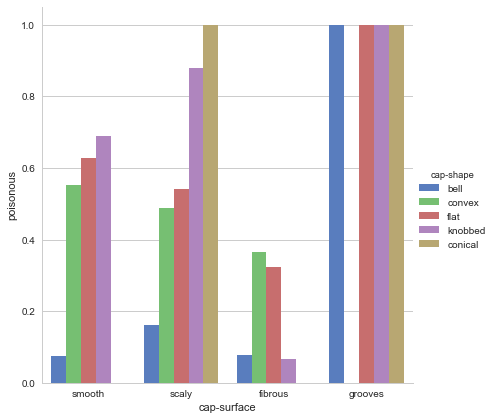

In [17]:
sns.factorplot("cap-surface", "poisonous", "cap-shape",
               data=df[df['cap-shape'] != 'sunken'], hue_order=['bell', 'convex', 'flat', 'knobbed', 'conical'],
               kind="bar",  palette="muted", ci=None, legend=True, size=6)

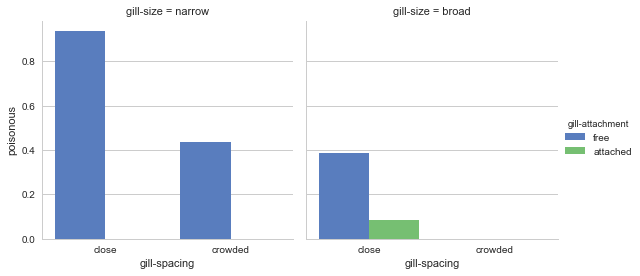

In [21]:
sns.factorplot("gill-spacing", "poisonous", "gill-attachment", col="gill-size",
               data=df,
               kind="bar",  palette="muted", ci=None, legend=True, size=4)

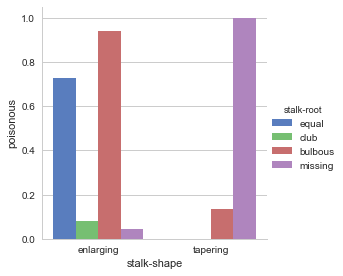

In [22]:
sns.factorplot("stalk-shape", "poisonous", "stalk-root",
               data=df[df["stalk-root"] != "rooted"],
               kind="bar",  palette="muted", ci=None, legend=True, size=4)

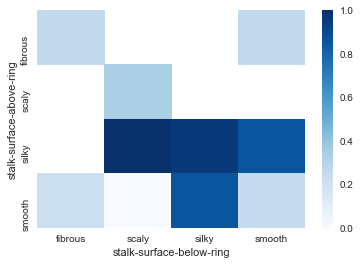

In [25]:
heat = pd.pivot_table(df, index="stalk-surface-above-ring", columns="stalk-surface-below-ring", 
                      values="poisonous")
sns.heatmap(heat, cmap="Blues")

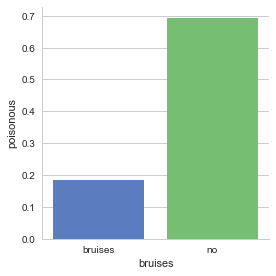

In [27]:
sns.factorplot("bruises", "poisonous",
               data=df, kind="bar",  palette="muted", ci=None, legend=True, size=4)

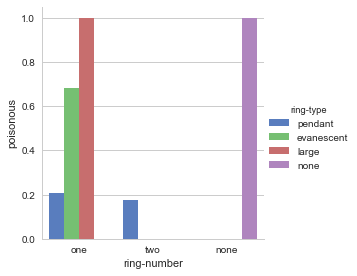

In [28]:
sns.factorplot("ring-number", "poisonous", "ring-type", 
               data=df[df["ring-type"] != "flaring"], 
               kind="bar",  palette="muted", ci=None, legend=True, size=4)

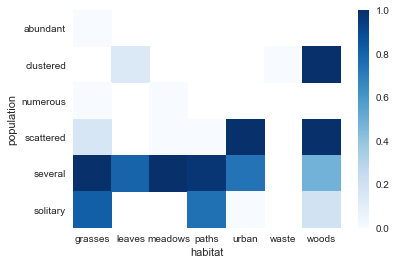

In [38]:
heat = pd.pivot_table(df, index="population", columns="habitat", 
                      values="poisonous")
sns.heatmap(heat, cmap="Blues")

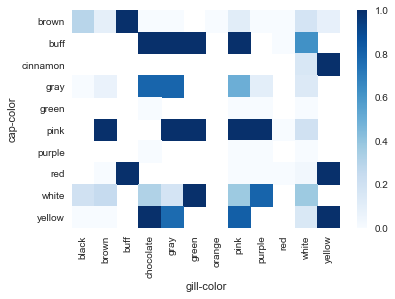

In [30]:
heat = pd.pivot_table(df, index="cap-color", columns="gill-color", 
                      values="poisonous")
sns.heatmap(heat, cmap="Blues")

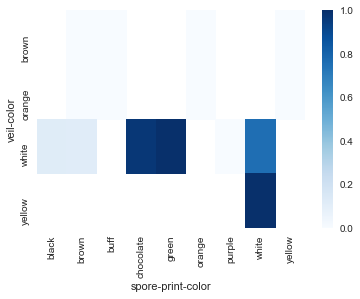

In [31]:
heat = pd.pivot_table(df, index="veil-color", columns="spore-print-color", 
                      values="poisonous")
sns.heatmap(heat, cmap="Blues")

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [33]:
X = pd.get_dummies(df.drop(['poisonous'], axis=1))
y = df['poisonous']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=41)

In [35]:
model = GaussianNB()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9615814994405073